# Tasks


#### 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
    
#### 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
    
#### 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
        
#### 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
    
#### 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
    
#### 6: Create an appropriate visualization to show the distribution of profiles.
    
#### 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
    
#### 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
    
#### 9: Produce suitable charts to illustrate your results and export them in your project folder.
    
#### 10: Tidy up your script, export your final data set, and save your notebook.


# Importing Libraries

#### 1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
path = r'C:\Users\maxca\Instacart Basket Analysis'

In [3]:
df_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_Instacart_Final.pkl'))

In [4]:
#Checking imported df_final
df_final.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both


In [5]:
df_final.columns.values.tolist()

['user_id',
 'First Name',
 'Surnam',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'order_id',
 'number_of_orders',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_hours',
 'max_order',
 'loyalty_flag',
 'product_price_mean',
 'spending_flag',
 'order_frequency_mean',
 'order_frequency_flag',
 'exists']

#### 2: Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

- Firstname and Surname are problematic and PIIs dropped accordingly

In [5]:
df_final = df_final.drop(columns = ['First Name', 'Surnam'])

In [6]:
df_final.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,number_of_orders,...,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Least busy days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both


#### 3: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.¶

- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


#### 3.1:Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [7]:
#Assigning States to regions
result_region = []

for value in df_final['STATE']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        result_region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        result_region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        result_region.append('South')
    else:
        result_region.append('West')

In [8]:
df_final['Regions'] = result_region

In [9]:
df_final.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,number_of_orders,...,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists,Regions
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Least busy days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest


#### 3.2: Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
Region_Spending_Habits = df_final.groupby('Regions')['spending_flag'].value_counts()

In [12]:
Region_Spending_Habits

Regions    spending_flag
Midwest    Low spender       7441350
           High spender       155975
Northeast  Low spender       5614511
           High spender       108225
South      Low spender      10582194
           High spender       209691
West       Low spender       8132559
           High spender       160354
Name: count, dtype: int64

#### Creating a bar chart for loyalty distribution in each Region

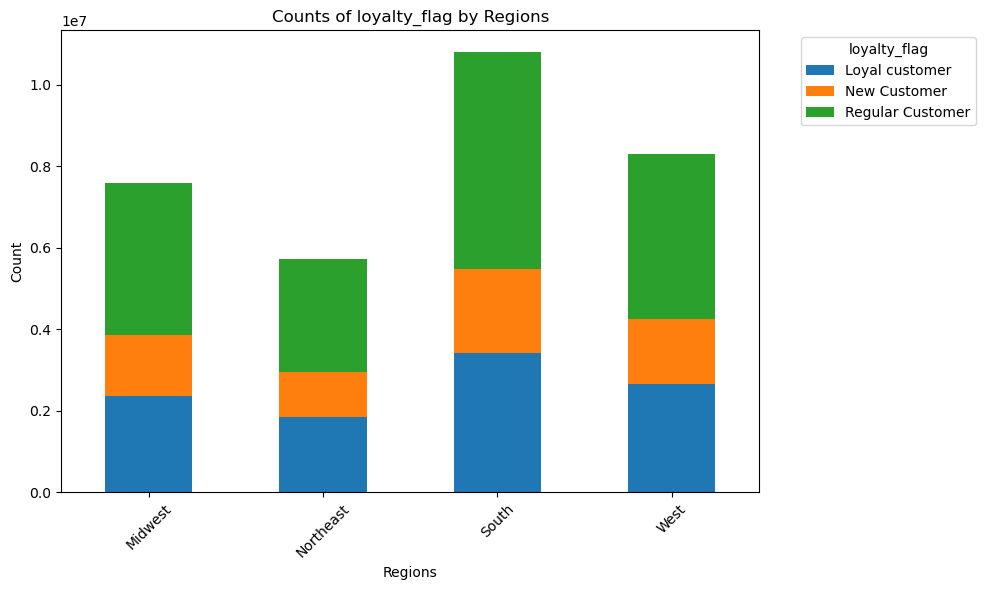

In [11]:
# Count the occurrences of each combination of 'loyalty_flag' and 'Regions'
grouped = df_final.groupby(['Regions', 'loyalty_flag']).size().unstack(fill_value=0)

# Making the bar chart
bar_loyalty_Regions = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
bar_loyalty_Regions.set_ylabel('Count')
bar_loyalty_Regions.set_xlabel('Regions')
bar_loyalty_Regions.set_title('Counts of loyalty_flag by Regions')



plt.xticks(rotation=45)
plt.legend(title='loyalty_flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
#Exporting bar_loyalty_Regions
bar_loyalty_Regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_Regions.png'))

#### As we can see: The spending habits from each region are relativly evenly distributed. -> We don't have any region that is under- or overperforming.

#### 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.¶

In [13]:
# Creating a low-activity exclution flag
df_final['Activity_flag'] = df_final.groupby(['user_id'])['max_order'].transform(np.max)

C:\Users\maxca\AppData\Local\Temp\ipykernel_10664\3417407303.py:2: FutureWarning: The provided callable <function amax at 0x00000201585787C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_final['Activity_flag'] = df_final.groupby(['user_id'])['max_order'].transform(np.max)


In [14]:
#Deriving Columns with loc()
df_final.loc[df_final['max_order'] < 5, 'Activity_flag'] = 'low_activity_customer'

C:\Users\maxca\AppData\Local\Temp\ipykernel_10664\3681026335.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low_activity_customer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_final.loc[df_final['max_order'] < 5, 'Activity_flag'] = 'low_activity_customer'


In [15]:
df_final.loc[df_final['max_order'] >=5, 'Activity_flag'] = 'high_activity_customer'

In [16]:
df_final.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,number_of_orders,...,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists,Regions,Activity_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer


In [17]:
# Creating df with high_activity_customers only
df_final_active = df_final[df_final['Activity_flag'] == 'high_activity_customer']

In [18]:
#Comparing both df
df_final_active.shape

(30964564, 33)

In [19]:
df_final.shape

(32404859, 33)

In [20]:
# Exporting df_final_active
df_final_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final_active.pkl'))

#### 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [21]:
#Importing departments df
df_departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [22]:
df_departments.head(20)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
# Dropping Unnamed:0 since this happens when you're importing and exporting again in csv.
df_departments = df_departments.drop(columns = ['Unnamed: 0'])

In [24]:
df_departments.head(20)

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


#### For a starting point we are generating groups with the variables age, family status and dependents:

- Age: 18-35 young, 36-64 middle aged, 65+ senior
- Family status: single, married, widdowed (counted as single), living with parents and siblings (counted as single)
- Parents: Yes/No

#### The variable will contain the following characteristics:

- Young Single
- Young Single Parent
- Young Married
- Young Married Parent

- Middle Aged Single
- Middle Aged Single Parent
- Middle Aged Married
- Middle Aged Parent

- Senior Single
- Senior Single Parent
- Senior Married
- Senior Married Parent

In [39]:
df_final_active.groupby('fam_status')['spending_flag'].value_counts()

fam_status                        spending_flag
divorced/widowed                  Low spender       2594950
                                  High spender        50321
living with parents and siblings  Low spender       1453246
                                  High spender        27926
married                           Low spender      21314254
                                  High spender       429457
single                            Low spender       4998689
                                  High spender        95721
Name: count, dtype: int64

In [41]:
# Generating a 70/30 Sample since it takes too long to generate the cust_profile_flag and visualizations.

In [42]:
# Create a list holding True/False values to the thest np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_final_active)) <= 0.7

In [43]:
#Store 70% of the sample in the df big
big = df_final_active[dev]

In [44]:
#Store 30% of the sample in the df small
small = df_final_active[~dev]

In [45]:
#Checking if both samples together have the same amount of data as the original

In [46]:
len(df_final_active)

30964564

In [47]:
len(big) + len(small)

30964564

In [48]:
df_final_small = small

In [49]:
# Creating customer profile flag 'Cust_profile_flag'

result_Cust_profile_flag = []

for index, row in df_final_small.iterrows():
    age = row['Age']
    fam_status = row['fam_status']
    n_dependants = row['n_dependants']
    
    # Young
    if age <= 35:
        if fam_status == 'single':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Young Single')
            else:
                result_Cust_profile_flag.append('Young Single Parent')
        elif fam_status == 'married':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Young Married')
            else:
                result_Cust_profile_flag.append('Young Married Parent')
        elif fam_status == 'divorced/widowed':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Young Single')
            else:
                result_Cust_profile_flag.append('Young Single Parent')
        elif fam_status == 'living with parents and siblings':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Young Single')
            else:
                result_Cust_profile_flag.append('Young Single Parent')
    
    # Middle Aged
    elif age > 35 and age <= 64:
        if fam_status == 'single':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Middle Aged Single')
            else:
                result_Cust_profile_flag.append('Middle Aged Single Parent')
        elif fam_status == 'married':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Middle Aged Married')
            else:
                result_Cust_profile_flag.append('Middle Aged Married Parent')
        elif fam_status == 'divorced/widowed':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Middle Aged Single')
            else:
                result_Cust_profile_flag.append('Middle Aged Single Parent')
        elif fam_status == 'living with parents and siblings':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Middle Aged Single')
            else:
                result_Cust_profile_flag.append('Middle Aged Single Parent')
    
    # Senior
    elif age >= 65:
        if fam_status == 'single':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Senior Single')
            else:
                result_Cust_profile_flag.append('Senior Single Parent')
        elif fam_status == 'married':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Senior Married')
            else:
                result_Cust_profile_flag.append('Senior Married Parent')
        elif fam_status == 'divorced/widowed':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Senior Single')
            else:
                result_Cust_profile_flag.append('Senior Single Parent')
        elif fam_status == 'living with parents and siblings':
            if n_dependants == 0:
                result_Cust_profile_flag.append('Senior Single')
            else:
                result_Cust_profile_flag.append('Senior Single Parent')
    
    else:
        result_Cust_profile_flag.append('Other')

In [50]:
df_final_small['Cust_profile_flag'] = result_Cust_profile_flag

C:\Users\maxca\AppData\Local\Temp\ipykernel_10664\1371370352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_small['Cust_profile_flag'] = result_Cust_profile_flag


In [51]:
df_final_small.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,number_of_orders,...,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists,Regions,Activity_flag,Cust_profile_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent


In [176]:
df_final_small['Cust_profile_flag'].value_counts()

Cust_profile_flag
Middle Aged Married Parent    3147122
Senior Married Parent         1850671
Young Married Parent          1524960
Middle Aged Single            1060928
Young Single                   653178
Senior Single                  607031
Young Single Parent            444578
Name: count, dtype: int64

#### Showing the amount of customers in each group:

Text(0.5, 1.0, 'Count of each customer profile group')

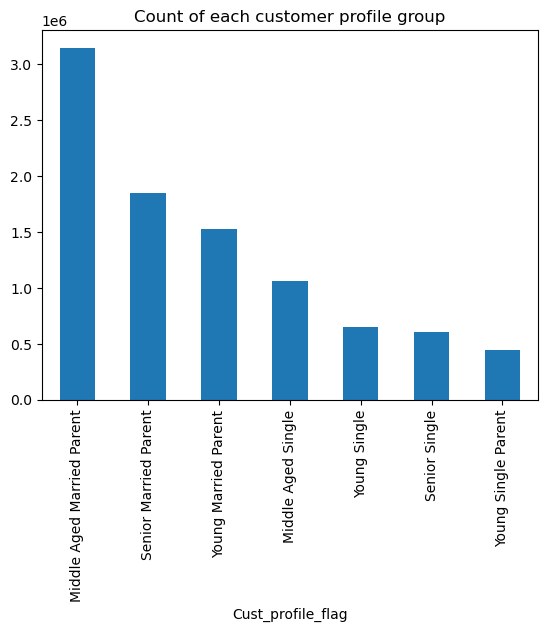

In [87]:
bar_Customer_profile_counts = df_final_small['Cust_profile_flag'].value_counts().plot.bar()
bar_Customer_profile_counts.set_title("Count of each customer profile group")

In [88]:
#Exporting bar_Customer_profile_counts
bar_Customer_profile_counts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Customer_profile_counts.png'))

#### Now we have our customer profiles. We're able to get different profiles for different goods, based on the profile. For example alcohol orders by day and hour:

In [55]:
#Filtering every order in department 4 (alcohol)

df_alcohol = df_final_small[df_final_small['department_id'] == 4]

In [82]:
#Or people who buy products for young kids/babies: 
df_baby = df_final_small[df_final_small['department_id'] == 17]

#### Now we're generating a income_flag to see how the different income groups line up with our customer_profile_flag:

#### divided into: 
- Low income: up to 28.000
- low-middle income: 28,001 to 55.000
- middle income: 55.001 to 89.744
- middle high income: 89.745 to 149.999
- high income: from 150.000 upwards

In [111]:
def get_income_flag(income):
    if income <= 28000:
        return 'Low income'
    elif 28001 <= income <= 55000:
        return 'Low-middle income'
    elif 55001 <= income <= 89744:
        return 'Middle income'
    elif 89745 <= income <= 149999:
        return 'Middle-high income'
    else:
        return 'High income'

In [112]:
df_final_small['income_flag'] = df_final_small['income'].apply(get_income_flag)

C:\Users\maxca\AppData\Local\Temp\ipykernel_10664\635181853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_small['income_flag'] = df_final_small['income'].apply(get_income_flag)


In [113]:
df_final_small.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,number_of_orders,...,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists,Regions,Activity_flag,Cust_profile_flag,income_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,New Customer,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income


#### 6: Create an appropriate visualization to show the distribution of profiles.

#### Now we can determine the income group proportion of every customer profile group:

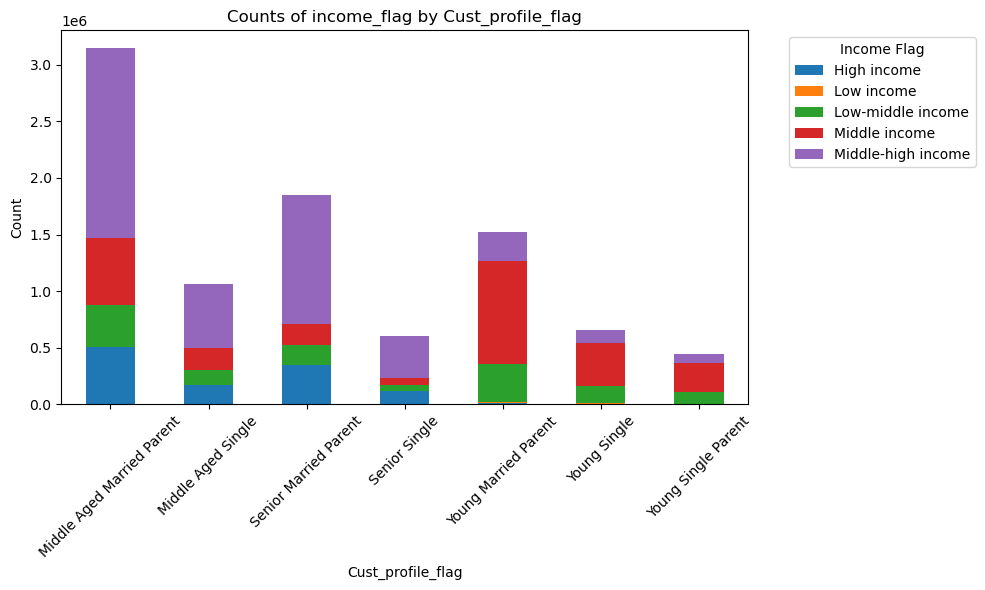

In [129]:
# Count the occurrences of each combination of 'Cust_profile_flag' and 'income_flag'
grouped = df_final_small.groupby(['Cust_profile_flag', 'income_flag']).size().unstack(fill_value=0)

# Making the bar chart
bar_income_cust_profile = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
bar_income_cust_profile.set_ylabel('Count')
bar_income_cust_profile.set_xlabel('Cust_profile_flag')
bar_income_cust_profile.set_title('Counts of income_flag by Cust_profile_flag')



plt.xticks(rotation=45)
plt.legend(title='Income Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [130]:
#Exporting bar_income_cust_profile
bar_income_cust_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_cust_profile.png'))

#### Alcohol:

#### Alcohol order frequency by hour:

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Order hour of alcohol per customer profile group')

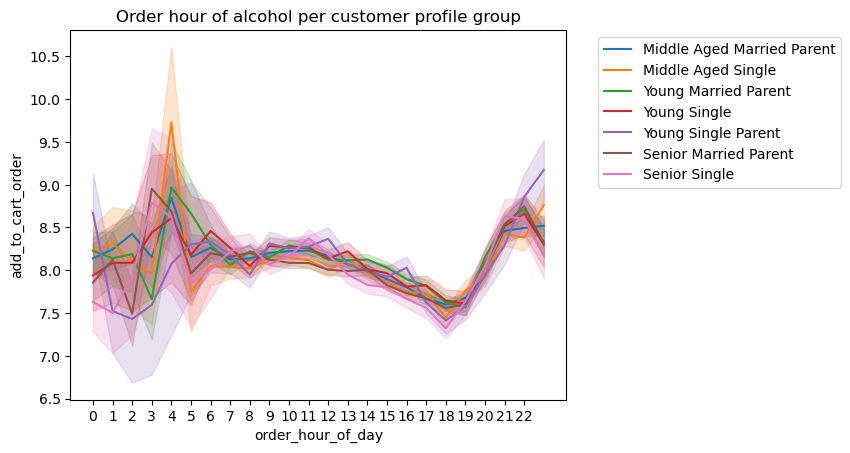

In [80]:
#Creating a Line chart for the order_hour_of_day and alcohol orders, grouped by our cust_profile_flag
line_Cust_profile_alkohol_hour = sns.lineplot(x='order_hour_of_day',y='add_to_cart_order', hue='Cust_profile_flag', data=df_alcohol)
plt.xticks(range(0, 23))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
line_Cust_profile_alkohol_hour.set_title("Order hour of alcohol per customer profile group")

In [89]:
#Exporting line_Cust_profile_alkohol_hour
line_Cust_profile_alkohol_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Cust_profile_alkohol_hour.png'))

#### Alcohol order frequency by day:

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Order day of alcohol per customer profile group')

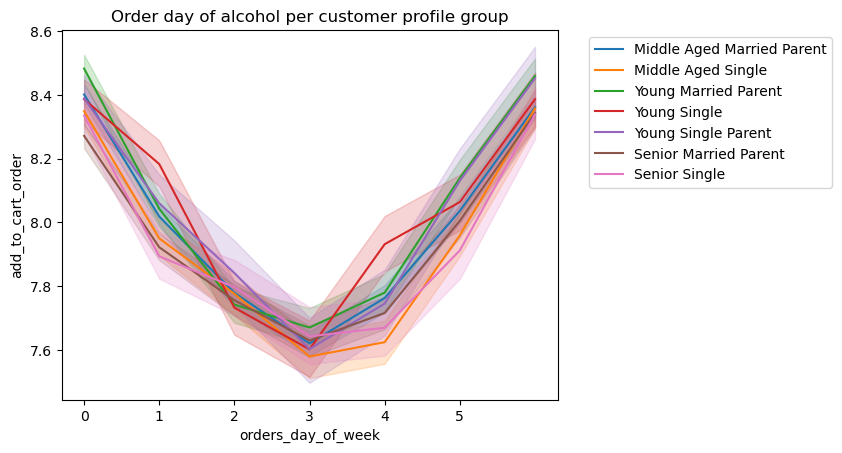

In [81]:
#Creating a Line chart for the orders_day_of_week and alcohol orders, grouped by our cust_profile_flag
line_Cust_profile_alkohol_day = sns.lineplot(x='orders_day_of_week',y='add_to_cart_order', hue='Cust_profile_flag', data=df_alcohol)
plt.xticks(range(0, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
line_Cust_profile_alkohol_day.set_title("Order day of alcohol per customer profile group")

In [90]:
#Exporting line_Cust_profile_alkohol_day
line_Cust_profile_alkohol_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_Cust_profile_alkohol_day.png'))

#### As we can see the order habits are relativly the same between the groups, tending to order in the nighttime and on the weekend, declining until the mid of the week.

#### people who buy products for young kids/babies: 

Text(0.5, 1.0, 'Baby products by customer profile group')

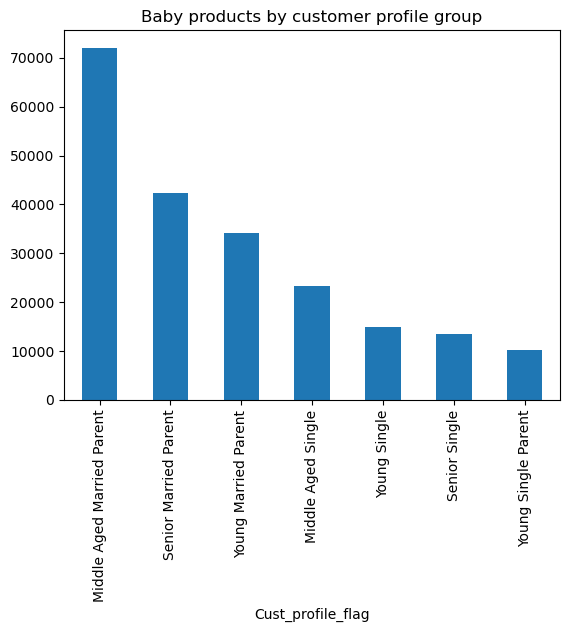

In [85]:
#Creating a Bar chart for the baby products
bar_baby = df_baby['Cust_profile_flag'].value_counts().plot.bar()
bar_baby.set_title("Baby products by customer profile group")

In [91]:
#Exporting bar_baby
bar_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby.png'))

#### Generating a chart for income classes and loyality status

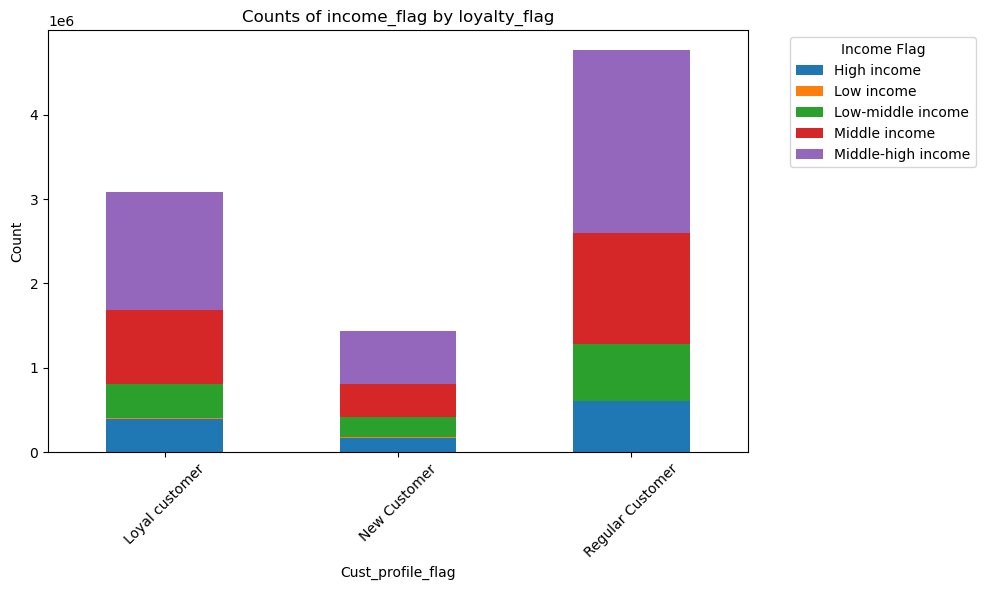

In [150]:
# Count the occurrences of each combination of 'Cust_profile_flag' and 'income_flag'
grouped = df_final_small.groupby(['loyalty_flag', 'income_flag']).size().unstack(fill_value=0)

# Making the bar chart
bar_income_loyalty = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
bar_income_loyalty.set_ylabel('Count')
bar_income_loyalty.set_xlabel('Cust_profile_flag')
bar_income_loyalty.set_title('Counts of income_flag by loyalty_flag')



plt.xticks(rotation=45)
plt.legend(title='Income Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [151]:
#Exporting bar_income_loyalty
bar_income_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_loyalty.png'))

#### 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [132]:
# Generating basic statistics for our Customer profile groups
df_final_small.groupby('Cust_profile_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                             mean  min   max
Cust_profile_flag                                           
Middle Aged Married Parent              10.830054  0.0  30.0
Middle Aged Single                      10.740166  0.0  30.0
Senior Married Parent                   10.807892  0.0  30.0
Senior Single                           10.763868  0.0  30.0
Young Married Parent                    10.826591  0.0  30.0
Young Single                            10.907582  0.0  30.0
Young Single Parent                     10.752835  0.0  30.0

In [133]:
# Looking at the counts of our customer profile groups
df_final_small['Cust_profile_flag'].value_counts(dropna = False)

Cust_profile_flag
Middle Aged Married Parent    3147122
Senior Married Parent         1850671
Young Married Parent          1524960
Middle Aged Single            1060928
Young Single                   653178
Senior Single                  607031
Young Single Parent            444578
Name: count, dtype: int64

#### Since we are working in our small sample I'm generating the percentages:

In [135]:
df_final_small['Cust_profile_flag'].value_counts(normalize=True)

Cust_profile_flag
Middle Aged Married Parent    0.338820
Senior Married Parent         0.199244
Young Married Parent          0.164178
Middle Aged Single            0.114220
Young Single                  0.070321
Senior Single                 0.065353
Young Single Parent           0.047863
Name: proportion, dtype: float64

#### We need a total_expanditure column to aggregate it towards the customer_profile_flag:

In [145]:
df_final_small['total_expanditure'] = df_final_small.groupby(['user_id'])['prices'].transform(np.sum)

C:\Users\maxca\AppData\Local\Temp\ipykernel_10664\1208465485.py:1: FutureWarning: The provided callable <function sum at 0x0000020158573E20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_final_small['total_expanditure'] = df_final_small.groupby(['user_id'])['prices'].transform(np.sum)
C:\Users\maxca\AppData\Local\Temp\ipykernel_10664\1208465485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_small['total_expanditure'] = df_final_small.groupby(['user_id'])['prices'].transform(np.sum)


In [146]:
df_final_small.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,number_of_orders,...,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists,Regions,Activity_flag,Cust_profile_flag,income_flag,total_expanditure
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income,56.1
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income,56.1
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income,56.1
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income,56.1
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,7.988889,Low spender,19.823529,Regular customer,both,Midwest,high_activity_customer,Middle Aged Married Parent,High income,56.1


In [147]:
df_final_small.groupby('Cust_profile_flag').agg({'total_expanditure': ['mean', 'min', 'max']})

total_expanditure             
                                        mean  min     max
Cust_profile_flag                                        
Middle Aged Married Parent       1027.153269  1.0  6880.9
Middle Aged Single               1050.612986  1.1  7384.1
Senior Married Parent            1023.435164  1.2  8046.5
Senior Single                    1017.806496  1.1  5047.3
Young Married Parent             1040.083230  2.0  5914.4
Young Single                     1020.865742  1.2  5288.4
Young Single Parent              1040.200193  2.0  4964.8

#### 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [161]:
#Regions days_since_prior_order
df_final_small.groupby(
    ['Cust_profile_flag', 'Regions']
).agg(
    ({'days_since_prior_order': ['mean', 'min', 'max']})
)

days_since_prior_order           
                                                       mean  min   max
Cust_profile_flag          Regions                                    
Middle Aged Married Parent Midwest                10.846500  0.0  30.0
                           Northeast              10.872424  0.0  30.0
                           South                  10.901567  0.0  30.0
                           West                   10.693632  0.0  30.0
Middle Aged Single         Midwest                10.669237  0.0  30.0
                           Northeast              11.132806  0.0  30.0
                           South                  10.717820  0.0  30.0
                           West                   10.589211  0.0  30.0
Senior Married Parent      Midwest                10.998866  0.0  30.0
                           Northeast              10.631701  0.0  30.0
                           South                  10.743214  0.0  30.0
                           West                   10.842441  0.0  30.0
Senior Single              Midwest                10.847463  0.0  30.0
                           Northeast              10.446657  0.0  30.0
                           South                  10.925863  0.0  30.0
                           West                   10.715080  0.0  30.0
Young Married Parent       Midwest                10.964062  0.0  30.0
                           Northeast              10.682614  0.0  30.0
                           South                  10.755798  0.0  30.0
                           West                   10.893698  0.0  30.0
Young Single               Midwest                10.944350  0.0  30.0
                           Northeast              10.924333  0.0  30.0
                           South                  10.942683  0.0  30.0
                           West                   10.814441  0.0  30.0
Young Single Parent        Midwest                11.019698  0.0  30.0
                           Northeast              10.511845  0.0  30.0
                           South                  10.690768  0.0  30.0
                           West                   10.751984  0.0  30.0

#### We can see that there is no difference between the regions in days_since_prior_order.

In [162]:
#Regions total_expanditure
df_final_small.groupby(
    ['Cust_profile_flag', 'Regions']
).agg(
    ({'total_expanditure': ['mean', 'min', 'max']})
)

total_expanditure             
                                                  mean  min     max
Cust_profile_flag          Regions                                 
Middle Aged Married Parent Midwest         1026.548308  1.1  6331.1
                           Northeast       1022.638361  1.3  6476.7
                           South           1008.478818  1.0  6880.9
                           West            1054.906625  2.3  5660.0
Middle Aged Single         Midwest         1066.391987  1.6  6345.2
                           Northeast        953.146984  1.1  5509.2
                           South           1070.015012  1.1  7384.1
                           West            1072.318710  2.0  4986.7
Senior Married Parent      Midwest          975.713373  1.2  8046.5
                           Northeast       1080.918907  1.4  6545.8
                           South           1022.856754  1.5  5727.4
                           West            1027.175832  1.9  5396.5
Senior Single              Midwest         1034.168044  1.1  5047.3
                           Northeast       1014.401199  2.3  3956.6
                           South           1002.356991  1.1  4589.6
                           West            1025.185713  1.3  4578.2
Young Married Parent       Midwest         1014.388053  2.0  4883.1
                           Northeast       1050.468646  2.0  5376.3
                           South           1059.129023  2.0  5798.5
                           West            1031.342407  3.8  5914.4
Young Single               Midwest          980.454994  1.2  5288.4
                           Northeast       1027.340724  4.1  5183.0
                           South           1060.304864  2.3  4604.3
                           West             998.734067  4.0  4401.2
Young Single Parent        Midwest          989.695223  3.6  3715.3
                           Northeast       1115.476079  3.9  4964.8
                           South           1050.740914  2.0  4819.1
                           West            1021.504495  2.4  4861.4

#### We can see that the differences between the regions regarding total_expanditure is relativly small.

In [163]:
#departments and days_since_prior_order
df_final_small.groupby(
    ['Cust_profile_flag', 'department_id']
).agg(
    ({'days_since_prior_order': ['mean', 'min', 'max']})
)

days_since_prior_order           
                                                           mean  min   max
Cust_profile_flag          department_id                                  
Middle Aged Married Parent 1                          11.338789  0.0  30.0
                           2                          10.710374  0.0  30.0
                           3                          10.814986  0.0  30.0
                           4                          10.601816  0.0  30.0
                           5                          10.261271  0.0  30.0
...                                                         ...  ...   ...
Young Single Parent        17                         11.556345  0.0  30.0
                           18                          9.829505  0.0  30.0
                           19                         10.648149  0.0  30.0
                           20                         10.838447  0.0  30.0
                           21                          9.327638  0.0  30.0

[147 rows x 3 columns]

In [164]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [165]:
df_final_small.groupby(
    ['Cust_profile_flag', 'department_id']
).agg(
    ({'days_since_prior_order': ['mean', 'min', 'max']})
)

days_since_prior_order           
                                                           mean  min   max
Cust_profile_flag          department_id                                  
Middle Aged Married Parent 1                          11.338789  0.0  30.0
                           2                          10.710374  0.0  30.0
                           3                          10.814986  0.0  30.0
                           4                          10.601816  0.0  30.0
                           5                          10.261271  0.0  30.0
                           6                          11.047532  0.0  30.0
                           7                          10.777018  0.0  30.0
                           8                          11.541252  0.0  30.0
                           9                          11.486006  0.0  30.0
                           10                          9.629390  0.0  30.0
                           11                         11.176792  0.0  30.0
                           12                         11.253988  0.0  30.0
                           13                         10.871379  0.0  30.0
                           14                         11.012185  0.0  30.0
                           15                         11.350692  0.0  30.0
                           16                         10.719012  0.0  30.0
                           17                         11.740830  0.0  30.0
                           18                          9.622107  0.0  30.0
                           19                         10.708244  0.0  30.0
                           20                         11.144760  0.0  30.0
                           21                          9.886208  0.0  30.0
Middle Aged Single         1                          11.390475  0.0  30.0
                           2                          10.475850  0.0  30.0
                           3                          10.761584  0.0  30.0
                           4                          10.481157  0.0  30.0
                           5                           9.661486  0.0  30.0
                           6                          10.854561  0.0  30.0
                           7                          10.718184  0.0  30.0
                           8                          12.280714  0.0  30.0
                           9                          11.461039  0.0  30.0
                           10                          9.688350  0.0  30.0
                           11                         11.126219  0.0  30.0
                           12                         11.114424  0.0  30.0
                           13                         10.729432  0.0  30.0
                           14                         10.824161  0.0  30.0
                           15                         11.240060  0.0  30.0
                           16                         10.648790  0.0  30.0
                           17                         11.708989  0.0  30.0
                           18                          9.771730  0.0  30.0
                           19                         10.638020  0.0  30.0
                           20                         10.842132  0.0  30.0
                           21                          9.981363  0.0  30.0
Senior Married Parent      1                          11.453470  0.0  30.0
                           2                          10.928973  0.0  30.0
                           3                          10.772201  0.0  30.0
                           4                          10.581931  0.0  30.0
                           5                          10.137967  0.0  30.0
                           6                          10.941644  0.0  30.0
                           7                          10.736815  0.0  30.0
                           8                          11.135207  0.0  30.0
                           9                          11.413086  0

#### As we can see the days since prior order are relativly close, with some differences about 2 days at max.

In [166]:
#departments and total_expanditure
df_final_small.groupby(
    ['Cust_profile_flag', 'department_id']
).agg(
    ({'total_expanditure': ['mean', 'min', 'max']})
)

total_expanditure              
                                                      mean   min     max
Cust_profile_flag          department_id                                
Middle Aged Married Parent 1                    973.140428   3.2  6880.9
                           2                    948.227691   6.7  6331.1
                           3                   1067.296844   6.3  6476.7
                           4                   1050.388569   1.0  6880.9
                           5                    630.025664   5.2  4065.5
                           6                   1008.767589  14.0  6476.7
                           7                    954.381574   1.1  6880.9
                           8                    879.132780   9.3  4324.2
                           9                   1021.581014   3.6  6476.7
                           10                  1074.145446  10.5  5619.3
                           11                   893.520312   2.9  6880.9
                           12                  1010.485320   8.1  6331.1
                           13                   989.427425   2.3  6880.9
                           14                  1051.152067   2.3  6880.9
                           15                  1010.601864   4.6  6331.1
                           16                  1074.456359   1.8  6880.9
                           17                   878.416545   2.1  6880.9
                           18                  1357.113068  15.1  6331.1
                           19                  1017.579697   2.2  6880.9
                           20                  1047.669946   1.7  6880.9
                           21                   905.026974  14.0  6880.9
Middle Aged Single         1                    989.510005   6.7  7384.1
                           2                    988.353085  27.7  5509.2
                           3                   1072.785914   4.9  7384.1
                           4                   1068.167375   3.8  7384.1
                           5                    737.561908   4.4  4605.5
                           6                   1034.692245   9.4  7384.1
                           7                    990.537940   1.1  7384.1
                           8                    895.861339  18.1  4605.5
                           9                   1054.460857   7.7  6345.2
                           10                  1174.583302   6.2  4986.7
                           11                   896.083722  14.6  7384.1
                           12                  1026.458146  16.7  7384.1
                           13                  1011.301480   2.8  7384.1
                           14                  1094.383598   2.9  7384.1
                           15                  1033.497953   2.3  6680.9
                           16                  1082.122760   2.8  7384.1
                           17                   881.830866   2.0  7384.1
                           18                  1446.084001  22.9  6345.2
                           19                  1062.299875   2.1  7384.1
                           20                  1110.935572   7.1  7384.1
                           21                   904.007909  14.8  7384.1
Senior Married Parent      1                    963.812843   4.6  8046.5
                           2                    862.842332  10.2  5023.1
                           3                   1076.310674   2.7  8046.5
                           4                   1044.019484   1.5  8046.5
                           5                    611.903625   3.4  5530.6
                           6                   1016.225577  13.9  6545.8
                           7                    953.065488   2.0  8046.5
                           8                    984.548683  16.2  4812.0
                           9                   1030.917137   6.0  8046.5
                           10                  1096.261022  21.8  8046.5
                          

#### As we can see we have differences in the spending in the different departments for the different groups.

#### 9: Produce suitable charts to illustrate your results and export them in your project folder.

Text(95.7222222222222, 0.5, 'Cust_profile_flag')

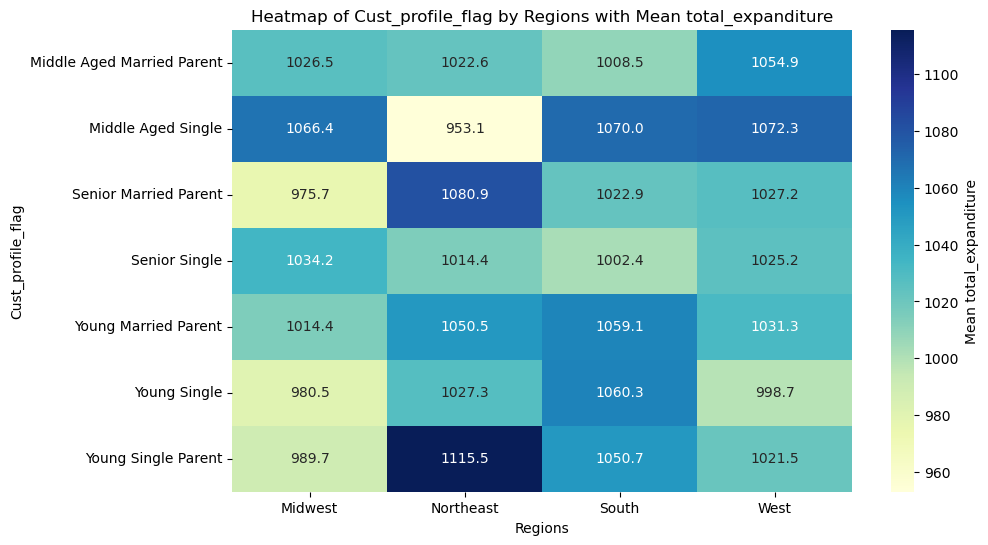

In [193]:
#Regions Heatmap tota_expanditure:

# Create a pivot table with 'Cust_profile_flag' as rows, 'Regions' as columns, and 'total_expenditure' as values
pivot_table = df_final_small.pivot_table(index='Cust_profile_flag', columns='Regions', values='total_expanditure', aggfunc='mean', fill_value=0)

# Plotting the heatmap'
plt.figure(figsize=(10, 6))
regions_expanditure = sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.1f', cbar_kws={'label': 'Mean total_expanditure'})
plt.title('Heatmap of Cust_profile_flag by Regions with Mean total_expanditure')
plt.xlabel('Regions')
plt.ylabel('Cust_profile_flag')

In [195]:
#Exporting regions_expanditure
regions_expanditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_expanditure.png'))

Text(120.7222222222222, 0.5, 'Cust_profile_flag')

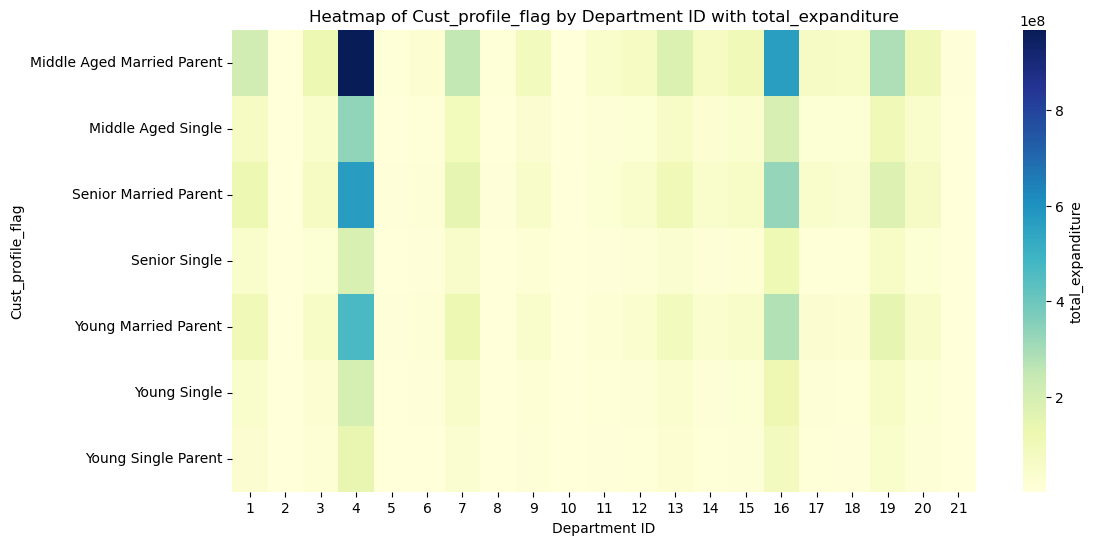

In [194]:
# Create a pivot table with 'Cust_profile_flag' as rows, 'department_id' as columns, and 'total_expanditure' as values
pivot_table3 = df_final_small.pivot_table(index='Cust_profile_flag', columns='department_id', values='total_expanditure', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
departments_expand = sns.heatmap(pivot_table3, cmap="YlGnBu", annot=False, fmt='.1f', cbar_kws={'label': 'total_expanditure'})
plt.title('Heatmap of Cust_profile_flag by Department ID with total_expanditure')
plt.xlabel('Department ID')
plt.ylabel('Cust_profile_flag')


In [196]:
#Exporting departments_expand
departments_expand.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_expand.png'))

#### 10: Tidy up your script, export your final data set, and save your notebook.

In [197]:
df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_Instacart_Final_new_Var.pkl'))

In [198]:
df_final_small.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_Instacart_Final_small_new_Var.pkl'))